<a href="https://colab.research.google.com/github/Saket0303/Handwritten-Digits-Classification/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

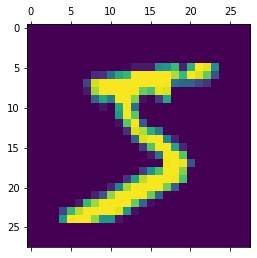

In [8]:
plt.matshow(x_train[0])

In [13]:
x_train = x_train / 255
x_test = x_test / 255


In [14]:
#flattening pixel matrix
x_train_flatten = x_train.reshape(len(x_train),28 * 28)
x_test_flatten = x_test.reshape(len(x_test),28 * 28)

In [15]:
x_test_flatten.shape

(10000, 784)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1874 - accuracy: 0.5598
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9764 - accuracy: 0.7143
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7899 - accuracy: 0.7378
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6261 - accuracy: 0.7594
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4832 - accuracy: 0.7763


In [19]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4033 - accuracy: 0.8011


[1.4033217430114746, 0.8011000156402588]

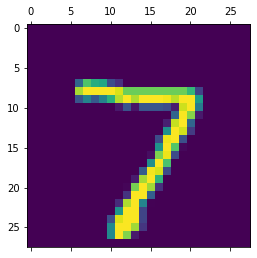

In [24]:
plt.matshow(x_test[0])

In [25]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([0.32180202, 0.4058661 , 0.35502854, 0.41233686, 0.47267988,
       0.38198003, 0.28519103, 0.8047806 , 0.3731333 , 0.5801626 ],
      dtype=float32)

In [26]:
np.argmax(y_predicted[0])

7

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [29]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [30]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [31]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 931,    2,    6,    9,    0,    3,   23,    1,    5,    0],
       [   0, 1112,    9,    3,    0,    0,    3,    0,    8,    0],
       [  19,   91,  793,   26,   15,    0,   30,   22,   35,    1],
       [   7,   54,   27,  860,    1,    2,    5,   21,   25,    8],
       [   2,   59,    3,    0,  775,    0,   30,    8,    3,  102],
       [  40,  122,    5,  202,   29,  384,   26,   34,   24,   26],
       [  29,   50,    8,    0,   13,    9,  848,    0,    1,    0],
       [   2,   76,   14,    2,    9,    0,    3,  895,    6,   21],
       [  24,  102,   11,   97,   13,    6,   16,   24,  656,   25],
       [  23,   45,    5,   12,   70,    0,    1,   88,    8,  757]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

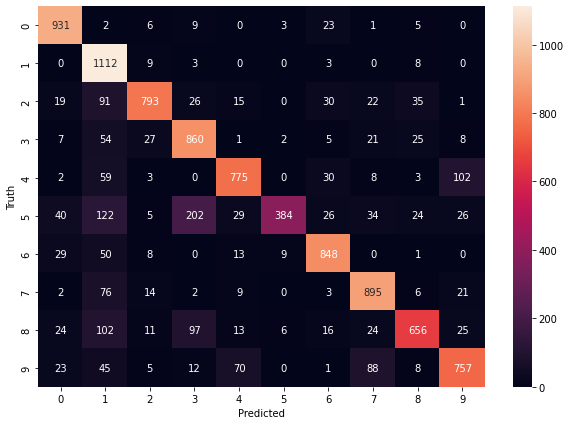

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
# adding hidden layer
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'sigmoid'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1471 - accuracy: 0.3489
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5197 - accuracy: 0.6690
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9736 - accuracy: 0.7829
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7110 - accuracy: 0.8284
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5757 - accuracy: 0.8547


In [34]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1951 - accuracy: 0.7214
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4999 - accuracy: 0.8711
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3908 - accuracy: 0.8930
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3471 - accuracy: 0.9031
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3227 - accuracy: 0.9085


In [35]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.9130


[0.30352655053138733, 0.9129999876022339]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

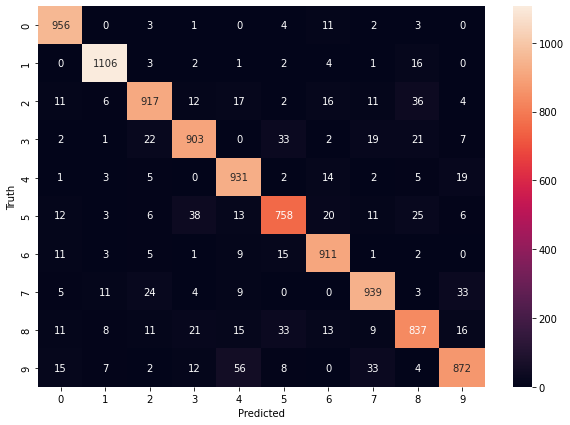

In [39]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')